# 時系列解析入門

# **3. 時系列データの可視化 (45分)**

# <font color="DarkOrange">1. 時系列データの視覚的理解</font>
時系列データは、時間に沿って記録されたデータです。<br>
これらを視覚的に理解することで、トレンド（傾向）、季節性、周期性、ノイズなどを把握できます。

本章では以下を学びます：

1.   時系列プロット：データを時間軸に沿って描画し、傾向や変動を視覚化
2.   自己相関プロット：データ内の過去の値との関係を調べ、周期性やパターンを確認
2.   ラグプロット：現在の値と遅れた値（過去の値）の相関を確認し、データ構造を理解







## <font color="SeaGreen">1-a 時系列データの可視化手法</font>

### <u>時系列プロット</u>
**利用データ**<br>
以下は2章でも利用しました、Kaggleで公開されているAir Passengers Datasetです。本章でも同じデータを利用して講義を進めていきます。まずはデータを読み込んで可視化し、**データ全体の傾向と変動の様子**を把握しましょう。

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<ipython-input-2-1cd397db6d24>:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('/content/drive/MyDrive/time_series/seminar/files/AirPassengers.csv',


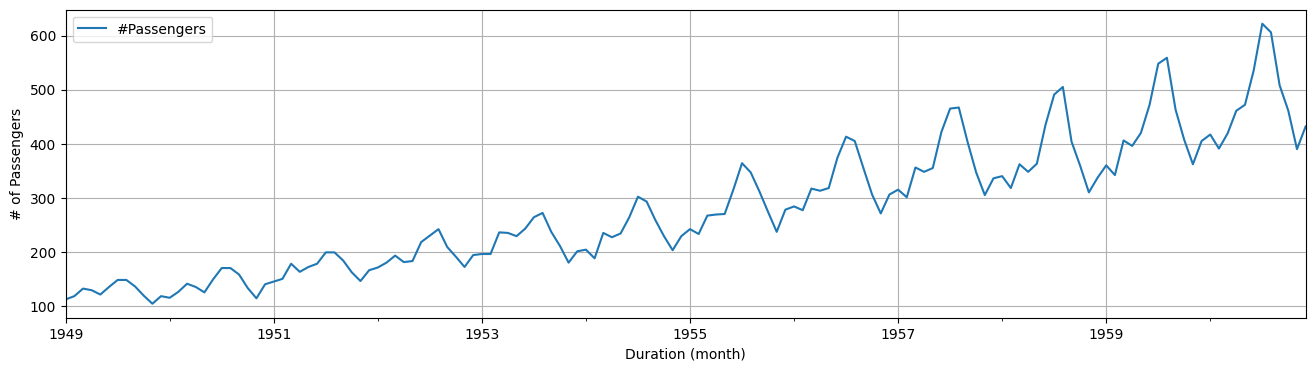

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime

dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('/content/drive/MyDrive/time_series/seminar/files/AirPassengers.csv',
                   index_col='Month',
                   date_parser=dateparse,
                   dtype='int')

# plot figure
data.plot(figsize=(16,4))
plt.xlabel('Duration (month)')
plt.ylabel('# of Passengers')
plt.grid(True)

続いて、対数変換を行います。

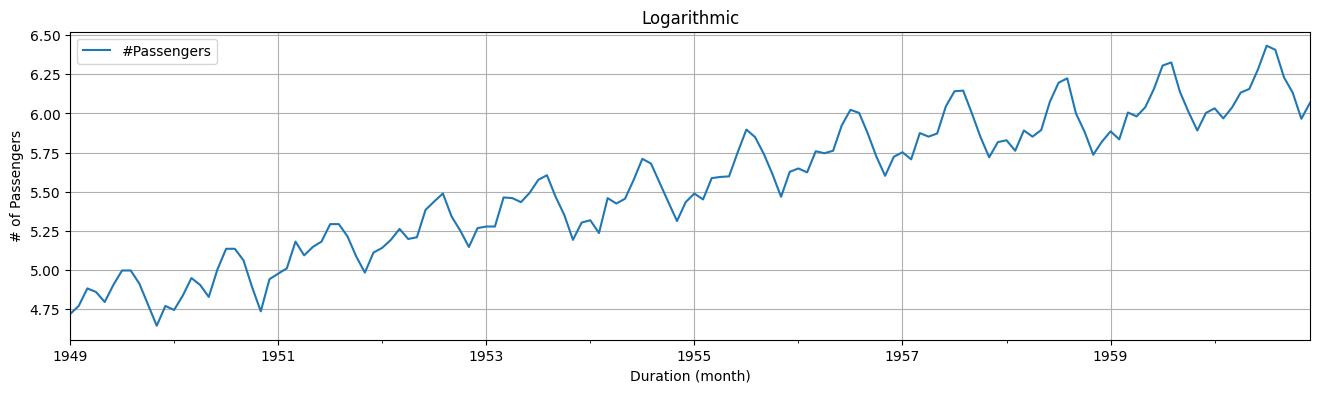

In [3]:
data_log = np.log(data)

# plot log data
data_log.plot(figsize=(16,4))
plt.title('Logarithmic')
plt.xlabel('Duration (month)')
plt.ylabel('# of Passengers')
plt.grid(True)

### <u>自己相関プロット</u>

#### 自己相関とは
時系列データの特徴を捉えるための方法として、自己相関が挙げられます。自己相関とは、簡単にいうと、データが自身の過去の値とどの程度関連しているかを時間をずらして測るものです。
例えば、時系列データの値を1期、2期、3期……と順番にずらしながら相関係数を求めていきます。この「時間のずれ」を「ラグ」と呼びます。

- ラグ1：データを1期ずらしたときの相関
- ラグ2：データを2期ずらしたときの相関
- ラグ3：データを3期ずらしたときの相関

このようにラグごとに相関係数を計算することで、データの周期性を検出することができます。


その際、<font color="red">一般的な手法としては、トレンドを除去した時系列データに対して自己相関分析を行い、周期性を検出します。</font>
トレンド（長期的な増減傾向）があると、データの平均や分散が時間とともに変化するため、自己相関分析の結果がトレンドによって歪められることがあります。
そのため、トレンドを除去することで、データの定常性を高め、自己相関に基づく周期性の検出が正確になります。

では、自己相関分析によりデータの周期性を検出してみましょう。
次の2つのパターンで実施していきます。

1. トレンドを除去しない場合：もとの時系列データのまま自己相関分析を実施します
1. トレンドを除去した場合：トレンド除去後の時系列データに対して自己相関分析を実施します

自己相関（Autocorrelation）と偏自己相関（Partial Autocorrelation）をプロットしてみます。
- 自己相関(ACF)プロット<br>
時系列データの過去の値との関係（自己相関）を調べるためのグラフです。
    - 縦軸（y軸）：
    自己相関の強さを表す（-1から1の範囲）。
    - 横軸（x軸）：
    ラグ（遅延）の数。ラグ1なら1つ前の値との関係、ラグ2なら2つ前の値との関係を表す。
    - 棒の高さ：
    そのラグでの自己相関の大きさを表す。
    - 薄い塗りつぶされた領域（信頼区間）：
    棒がこの範囲を超えている場合、そのラグの相関は**統計的に意味がある（有意）**と判断できる。

    例）季節性のあるデータ（1年周期のデータ）をACFプロットで調べると、12ヶ月ごとに高い自己相関のピークが現れることがあります。これで「12ヶ月周期」があることを確認できます。

- 偏自己相関(PACF)プロット<br>
時系列データの直接的な影響を調べるためのグラフです。他の遅れ（ラグ）の影響を取り除いた場合に、特定のラグが現在の値にどれくらい影響しているかを示します。

    例）もしデータがラグ1とラグ2の値に影響されている場合、PACFプロットではラグ1とラグ2に大きな棒が現れるかもしれません。しかし、ラグ3以降では棒が小さくなることがあります。これにより、データの直接的な関係が短期的（ラグ1やラグ2）で終わっていると判断できます。


1. トレンドを除去しない場合<br>
もとの時系列データのまま自己相関（Autocorrelation）と偏自己相関（Partial Autocorrelation）をプロットしてみます。

In [4]:
from statsmodels.tsa import stattools as tsat
import statsmodels.graphics.tsaplots as tsap
from statsmodels.tsa.seasonal import STL

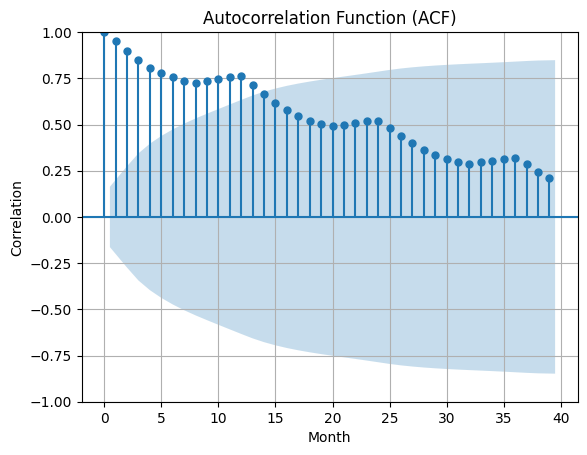

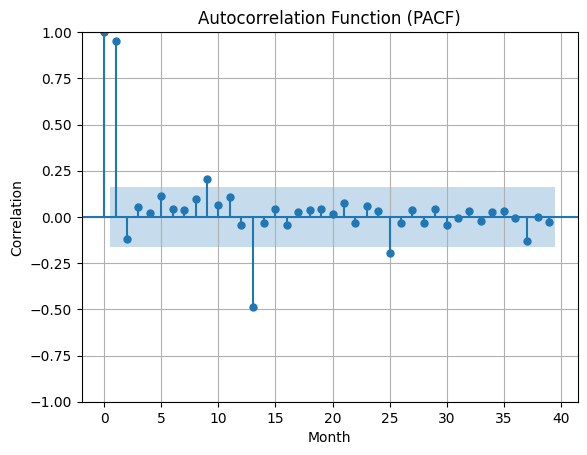

In [5]:
# compute and plot autocorrelation
fig = tsap.plot_acf(data_log, lags=range(40))
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Month')
plt.ylabel('Correlation')
plt.grid(True)

fig = tsap.plot_pacf(data_log, lags=range(40))
plt.title('Autocorrelation Function (PACF)')
plt.xlabel('Month')
plt.ylabel('Correlation')
plt.grid(True)

なんとなく12ヶ月ごとの相関が見てとれますが自明ではありませんね。もっとも高い自己相関値を持つのは、同じ時刻を除いて直近一ヶ月となっています。これは乗客数の上昇トレンドによるもので、今回扱うデータを自己相関のみで予測するのは難しそうです。

2. トレンドを除去した場合<br>
トレンド除去後の時系列データに対して自己相関（Autocorrelation）と偏自己相関（Partial Autocorrelation）をプロットしてみます。

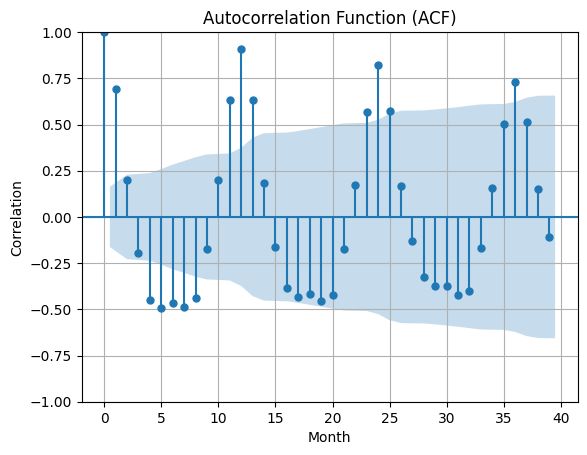

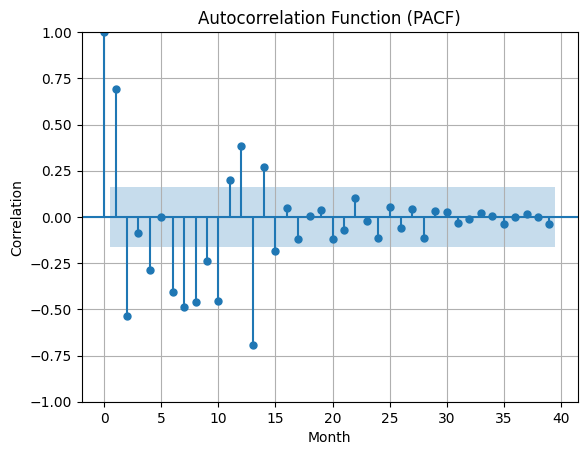

In [6]:
# decomposition
stl=STL(data_log, robust=True)
stl_series = stl.fit()

# compute and plot autocorrelation
fig = tsap.plot_acf(stl_series.seasonal, lags=range(40))
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Month')
plt.ylabel('Correlation')
plt.grid(True)

fig = tsap.plot_pacf(stl_series.seasonal, lags=range(40))
plt.title('Autocorrelation Function (PACF)')
plt.xlabel('Month')
plt.ylabel('Correlation')
plt.grid(True)

ACFプロットを見ると、ラグ12、24、36、…といった位置で自己相関が高い値を示していることがわかります。ラグ12ごとに相関が高いので、12周期の季節性が存在する可能性があります。<br>
※もっとも高い自己相関値を持つのは、同じ時刻を除いて直近一ヶ月となっています。これは乗客数の上昇トレンドによるものと考えられます。<br>
一方で、PACFプロットを見ると、ラグ12で偏自己相関が高いことがわかります。一方、ラグ24や36では偏自己相関が小さい、あるいは有意ではない場合があります。<br>
ラグ12でのみ偏自己相関が高いため、データに直接的な影響を与える周期は12周期であり、それ以上のラグ（24、36など）は間接的な影響によるものと考えられます。結論として、データの季節性の周期は12周期である可能性が非常に高いと言えます。

以下、ACFとPACFの違いを簡単にまとめます。

| **項目** | **ACFプロット** | **PACFプロット** |
| :---: | :---: | :---: |
| 目的 | 全体の自己相関を見る | 他のラグの影響を取り除いた直接的な相関を見る |
| 影響を考慮するか  | 他のラグの影響も含めて計算 | 他のラグの影響を制御した相関のみを計算 |
| 使いどころ| データの周期性や全体的な関連性を把握 | ARモデルの次数（ラグ数）を選ぶ際に役立つ |



### <u>ラグプロット</u>
ラグプロットは、時系列データの現在の値と過去の値を散布図として描くプロットです。
ラグプロットを使うと、時系列データに自己相関（過去の値との関連性）があるかどうかを視覚的に確認できます。

#### ラグプロットの見方
- 線形のパターンが見られる場合（強い自己相関の存在）：<br>
現在の値と過去の値が直線的な関係を持つ場合、データに強い自己相関があることを示しています。これは、データが過去の値に大きく依存していることを意味します。

- ランダムな分布の場合（自己相関の欠如）：<br>
散布図が特定のパターンを持たず、点が無作為に配置されている場合、データに自己相関がほとんどないことを示しています。これは、データが過去の値に依存せず、ランダムな動きをしている可能性を示唆します。

- 周期的なパターンが見られる場合（季節性や周期性の存在）：<br>
特定のラグで周期的なパターンが現れる場合、データに季節性や周期的な変動が含まれている可能性があります。これは、一定の周期でデータが繰り返す傾向を持つことを示しています。


トレンドの影響を除去するために、差分を取ります。
トレンドが除去されると線形性が弱まり、データのランダム性や周期性がより明確に現れます。

ラグ1、ラグ6、ラグ12についてラグプロットを作成してみます。

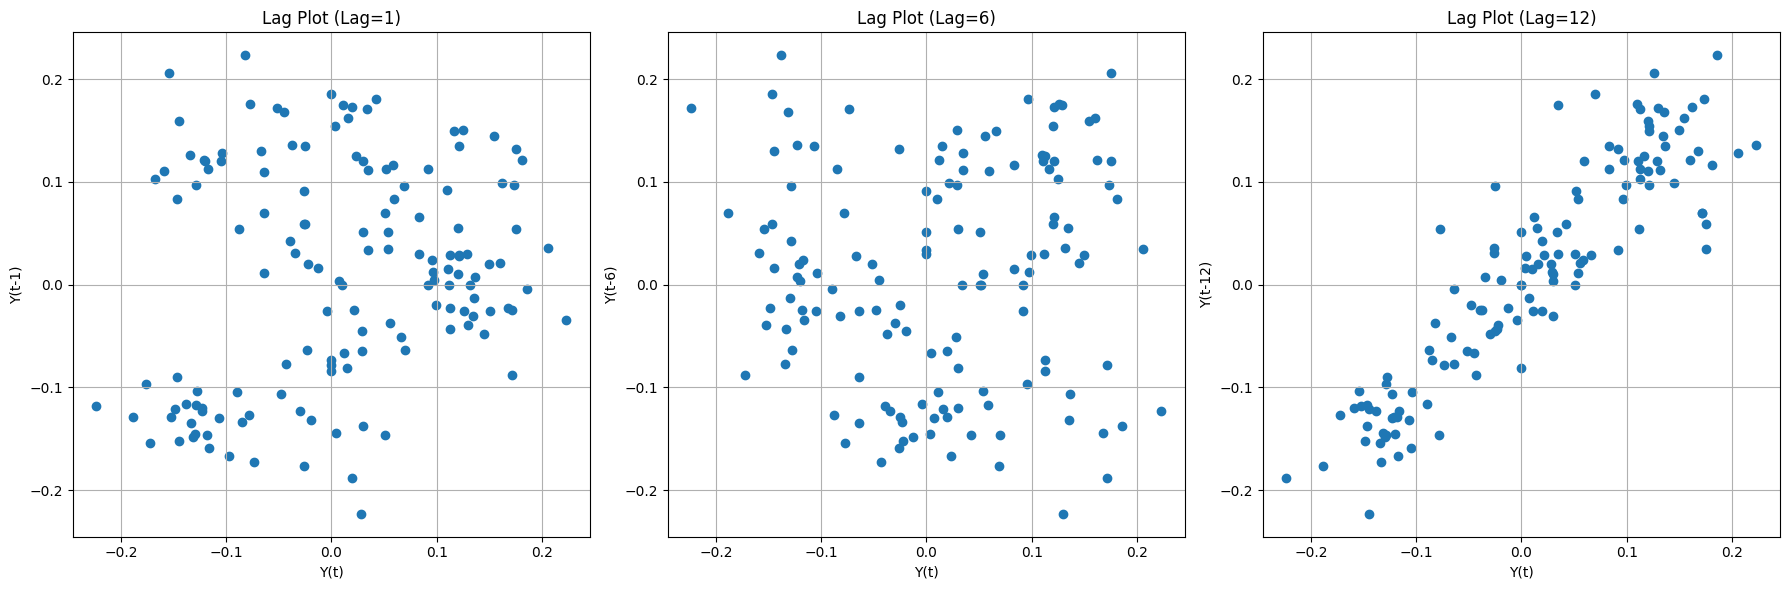

In [7]:
from pandas.plotting import lag_plot
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

# トレンドを除去（1階差分）
diff_data = data_log.diff(periods=1)

# 横並びに3つのラグプロットを描画
plt.figure(figsize=(18, 6))

# ラグ1のプロット
plt.subplot(1, 3, 1)  # 1行3列の1つ目
lag_plot(diff_data, lag=1)
plt.title("Lag Plot (Lag=1)")
plt.xlabel("Y(t)")
plt.ylabel("Y(t-1)")
plt.grid(True)

# ラグ6のプロット
plt.subplot(1, 3, 2)  # 1行3列の2つ目
lag_plot(diff_data, lag=6)
plt.title("Lag Plot (Lag=6)")
plt.xlabel("Y(t)")
plt.ylabel("Y(t-6)")
plt.grid(True)

# ラグ12のプロット
plt.subplot(1, 3, 3)  # 1行3列の3つ目
lag_plot(diff_data, lag=12)
plt.title("Lag Plot (Lag=12)")
plt.xlabel("Y(t)")
plt.ylabel("Y(t-12)")
plt.grid(True)

# レイアウト調整と表示
plt.tight_layout()
plt.show()


プロット結果から、ラグ12（12期間前の値）との間に強い正の相関がありそうです。これは、データに12周期の季節性が存在する可能性が高いことを示しています。

## <font color="SeaGreen">1-b トレンドと季節性のプロット</font>